In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, auc


In [2]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

# Display the first few rows
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

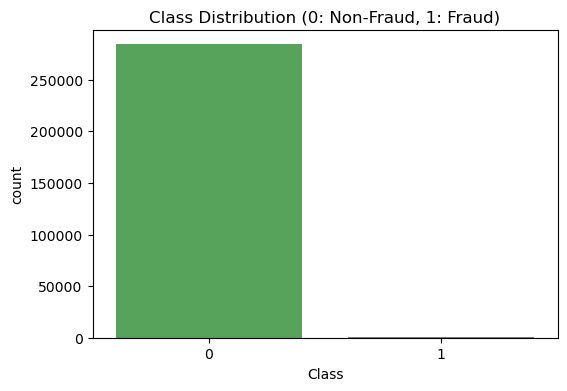

In [3]:
# Visualize the class distribution (Fraud vs. Non-Fraud)
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette=['#4CAF50', '#F44336'])
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()


In [4]:
# Display the count of fraud vs. non-fraud cases
fraud_count = data['Class'].value_counts()
print(fraud_count)

Class
0    284315
1       492
Name: count, dtype: int64


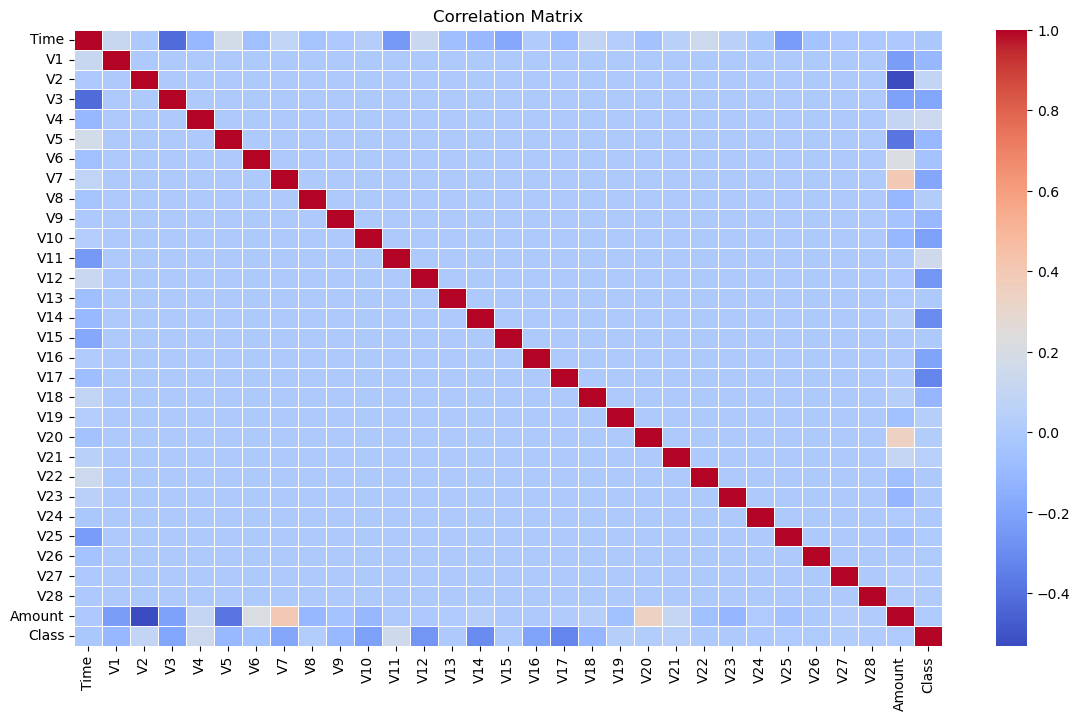

In [5]:
# Correlation matrix
plt.figure(figsize=(14, 8))
corr = data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Standardize the 'Amount' feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop unnecessary features like 'Time' if not needed
data = data.drop(['Time'], axis=1)

# Define the features (X) and the target (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [9]:
# Make predictions
y_pred = model.predict(X_test)

In [10]:

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[83456  1851]
 [   21   115]]


In [11]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred)) 


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.85      0.11       136

    accuracy                           0.98     85443
   macro avg       0.53      0.91      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [12]:
# Calculate and print precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.05849440488301119
Recall: 0.8455882352941176


In [13]:
# Calculate and print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.9119450665727039


In [14]:
# Perform cross-validation to assess the model's performance
cross_val_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f'Cross-Validation ROC AUC Scores: {cross_val_scores}')
print(f'Average Cross-Validation ROC AUC Score: {np.mean(cross_val_scores)}')

Cross-Validation ROC AUC Scores: [0.98313915 0.9814746  0.99196292 0.90462421 0.92656377 0.95375189
 0.9895839  0.96507298 0.97028789 0.95577226]
Average Cross-Validation ROC AUC Score: 0.9622233577700265


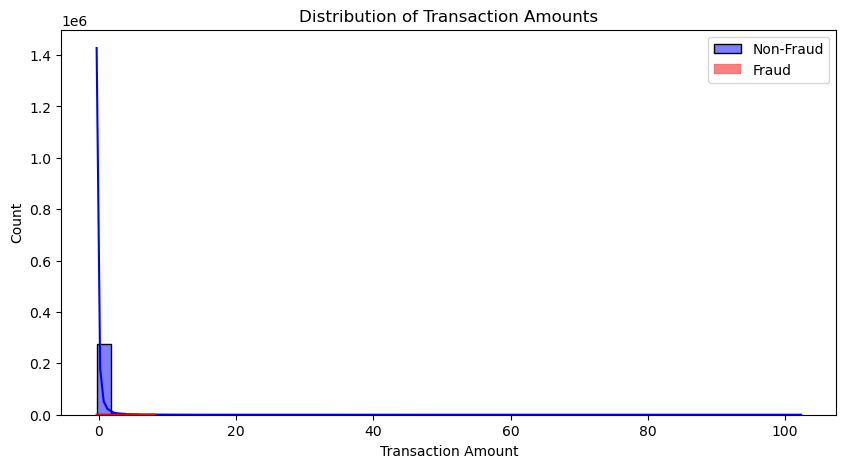

In [15]:

# Distribution of the 'Amount' feature for fraud and non-fraud cases
plt.figure(figsize=(10, 5))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraud')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.legend()
plt.show()

In [16]:

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

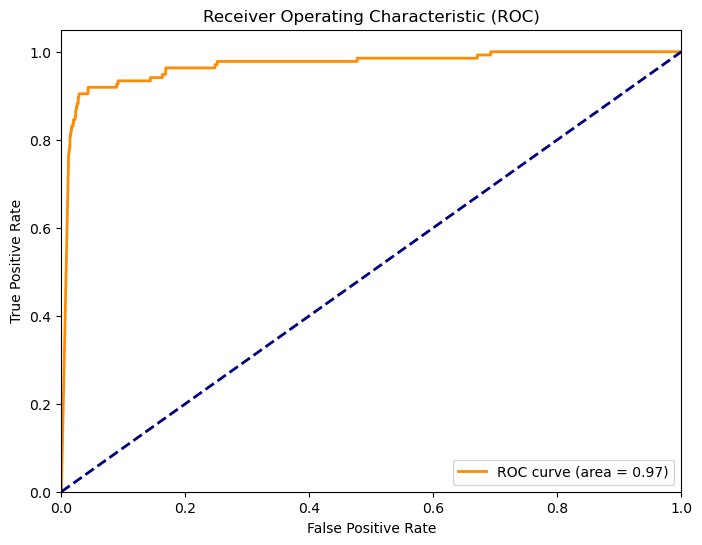

In [17]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

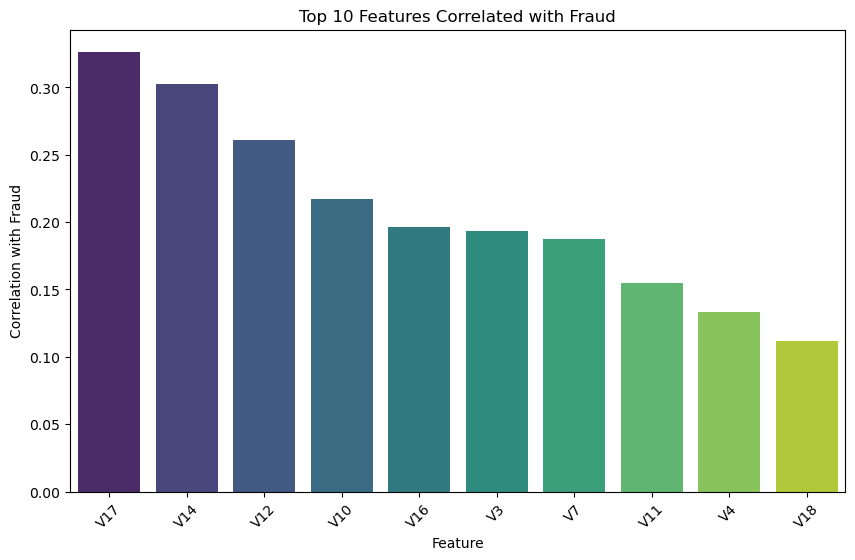

In [18]:
# Plot the top features by importance
# Since GaussianNB doesn't provide feature importances, this can be done using other methods.
# Here, we'll assume the importance is based on correlation with the target variable.

importance = abs(corr['Class']).sort_values(ascending=False)[1:11]  # Top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=importance.index, y=importance.values, palette='viridis')
plt.title('Top 10 Features Correlated with Fraud')
plt.xlabel('Feature')
plt.ylabel('Correlation with Fraud')
plt.xticks(rotation=45)
plt.show()

In [19]:
Summary of Visualization Steps:
Class Distribution: To see the imbalance in fraud vs. non-fraud cases.
Correlation Matrix: To identify relationships between features.
Feature Distributions: To visualize how different features vary for fraud and non-fraud cases.
ROC Curve: To visualize model performance (optional).
Feature Importance: To understand which features are most relevant for detecting fraud.


SyntaxError: invalid syntax (3397182664.py, line 1)